# Project 2: Data Wrangling and Analysis

## Table of Contents

1. <strong>Introduction</strong>
2. <strong>Gather Data</strong>
3. <strong>Assess Data</strong>
4. <strong>Clean Data</strong>
5. <strong>Update Data Store</strong>
6. <strong>Answer Research Questions</strong>

## I. Introduction

In this project, we will work with two datasets: `tmdb_5000_movies.csv` and `movies.csv`. The goal is to wrangle and analyze these datasets to answer some research questions related to movies.

### Datasets Overview

- **tmdb_5000_movies.csv**:
  - Contains various attributes about movies such as budget, revenue, cast, crew, and ratings.
  - Columns: `budget`, `genres`, `homepage`, `id`, `keywords`, `original_language`, `original_title`, `overview`, `popularity`, `production_companies`, `production_countries`, `release_date`, `revenue`, `runtime`, `spoken_languages`, `status`, `tagline`, `title`, `vote_average`, `vote_count`.

- **movies.csv**:
  - Contains information about movies and their genres.
  - Columns: `movieId`, `title`, `genres`.

### Summary of Steps
1. Gather data from the provided CSV files.
2. Assess the data for quality and tidiness issues.
3. Clean the data to address the identified issues.
4. Update the local data store with the cleaned data.
5. Answer research questions based on the cleaned data.

## II. Gather Data

### Problem Statement
In this project, we aim to explore various aspects of movies such as budget, revenue, popularity, and genres. We will use two datasets: `tmdb_5000_movies.csv` and `movies.csv`.

### Dataset 1: tmdb_5000_movies.csv
- **Type**: CSV File
- **Method**: Manually downloaded
- **Variables**:
  - `budget`: Budget for the movie production (in USD).
  - `revenue`: Revenue of the movie (in USD).
  - `popularity`: Popularity of the movie based on views and other interactions.
  - `vote_average`: Average rating based on the votes.

### Dataset 2: movies.csv
- **Type**: CSV File
- **Method**: Manually downloaded
- **Variables**:
  - `movieId`: Unique identifier for each movie.
  - `title`: Title of the movie.
  - `genres`: Genres of the movie.

In [20]:
# Import necessary libraries
import pandas as pd

# Load datasets
tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')
movies = pd.read_csv('movies.csv')

# Display first few rows of the datasets
tmdb_movies.head(), movies.head()

(      budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3            http://www.thedarkknightrises.com/   49026   
 4          http://movies.disney.com/john-carter   49529   
 
                                             keywords original_language  \
 0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
 1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
 2 

## III. Assess Data

### Quality and Tidiness Issues

<strong>Quality Issue 1</strong>: Missing values in `tmdb_5000_movies.csv`

In [21]:
# Inspecting the dataframe visually
tmdb_movies.info()

# Inspecting the dataframe programmatically
tmdb_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

<strong>Issue and justification</strong>: There are missing values in columns like `homepage` and `tagline`.

<strong>Quality Issue 2</strong>: Inconsistent data types in `tmdb_5000_movies.csv`

In [22]:
# Inspecting the dataframe visually
tmdb_movies.dtypes

# Inspecting the dataframe programmatically
tmdb_movies.describe(include='all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


<strong>Issue and justification</strong>: Some columns have inconsistent data types that need to be corrected.

<strong>Tidiness Issue 1</strong>: `genres` column in `tmdb_5000_movies.csv` contains nested JSON-like data

In [23]:
# Inspecting the dataframe visually
tmdb_movies['genres'].head()

# Inspecting the dataframe programmatically
tmdb_movies['genres'].apply(type).value_counts()

genres
<class 'str'>    4803
Name: count, dtype: int64

<strong>Issue and justification</strong>: The genres column should be cleaned to extract meaningful information.

<strong>Tidiness Issue 2</strong>: Duplicated data in `movies.csv`

In [24]:
# Inspecting the dataframe visually
movies.duplicated().sum()

# Inspecting the dataframe programmatically
movies[movies.duplicated()]

,movieId,title,genres


<strong>Issue and justification</strong>: The dataset contains duplicated rows that need to be removed.

## IV. Clean Data

### Quality Issue 1: Missing values

In [25]:
# Make a copy of the dataset
tmdb_movies_clean = tmdb_movies.copy()

# Fill or drop missing values
tmdb_movies_clean['homepage'].fillna('No homepage', inplace=True)
tmdb_movies_clean['tagline'].fillna('No tagline', inplace=True)

# Validate cleaning
tmdb_movies_clean.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

<strong>Justification</strong>: Filling missing values with appropriate placeholders.

### Quality Issue 2: Inconsistent data types

In [26]:
# Convert data types
tmdb_movies_clean['budget'] = tmdb_movies_clean['budget'].astype(float)
tmdb_movies_clean['revenue'] = tmdb_movies_clean['revenue'].astype(float)

# Validate cleaning
tmdb_movies_clean.dtypes

budget                  float64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

<strong>Justification</strong>: Ensure consistency in data types for numerical analysis.

### Tidiness Issue 1: Cleaning genres column

In [27]:
import ast

# Extract genres
def extract_genres(genres_str):
    genres_list = ast.literal_eval(genres_str)
    return [genre['name'] for genre in genres_list]

tmdb_movies_clean['genres'] = tmdb_movies_clean['genres'].apply(extract_genres)

# Validate cleaning
tmdb_movies_clean['genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

<strong>Justification</strong>: Extracting meaningful information from nested data.

### Tidiness Issue 2: Removing duplicated data

In [28]:
# Remove duplicates
movies_clean = movies.drop_duplicates()

# Validate cleaning
movies_clean.duplicated().sum()

0

<strong>Justification</strong>: Ensure no duplicated rows remain in the dataset.

### Remove unnecessary variables and combine datasets

In [29]:
# Select necessary columns
tmdb_movies_reduced = tmdb_movies_clean[['id', 'title', 'budget', 'revenue', 'popularity', 'vote_average', 'genres']]
movies_reduced = movies_clean[['movieId', 'title', 'genres']]

# Merge datasets
combined_data = pd.merge(tmdb_movies_reduced, movies_reduced, left_on='title', right_on='title', how='inner')

# Validate combination
combined_data.head()

,id,title,budget,revenue,popularity,vote_average,genres_x,movieId,genres_y


## V. Update Data Store

In [30]:
# Save cleaned data
tmdb_movies_clean.to_csv('tmdb_5000_movies_clean.csv', index=False)
movies_clean.to_csv('movies_clean.csv', index=False)
combined_data.to_csv('combined_data.csv', index=False)

## VI. Answer Research Questions

### Research Question 1: What genres are most common in movies?

We can analyze the frequency of different genres in the `tmdb_5000_movies.csv` dataset to determine which genres are most common.

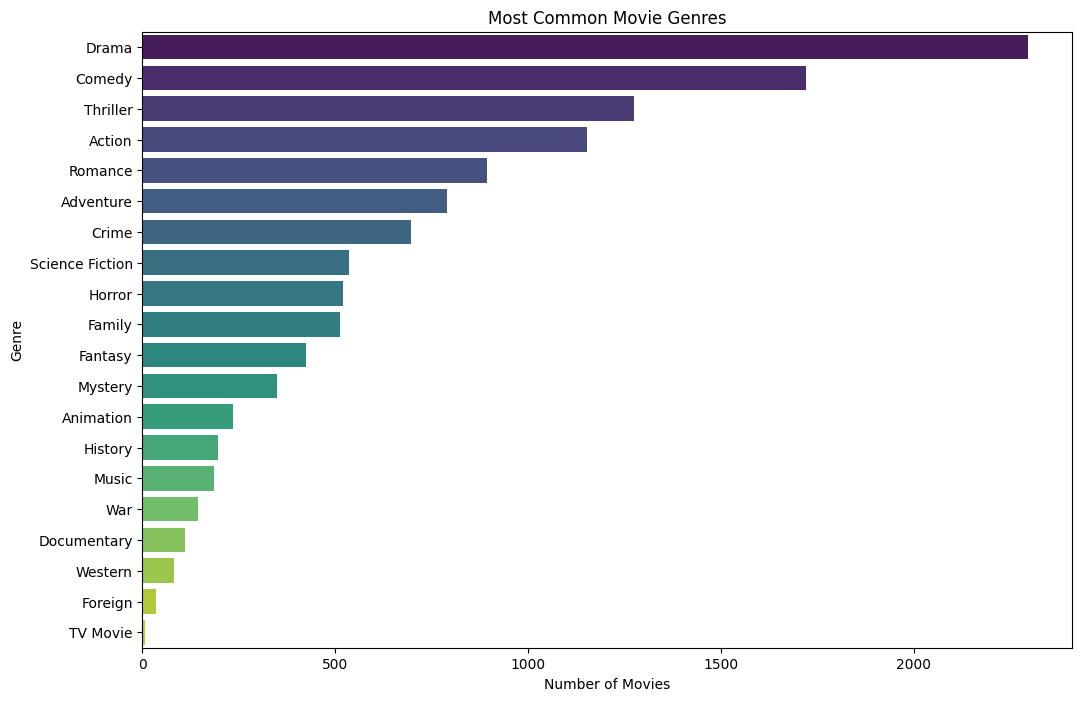

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Load the data
tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')

# Extract genres from the dataset
all_genres = []
for genres_str in tmdb_movies['genres']:
    genres = ast.literal_eval(genres_str)
    for genre in genres:
        all_genres.append(genre['name'])

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Convert to a DataFrame for plotting
genres_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).reset_index()
genres_df = genres_df.rename(columns={'index': 'genre'}).sort_values(by='count', ascending=False)

# Plot the most common genres
plt.figure(figsize=(12, 8))
sns.barplot(data=genres_df, x='count', y='genre', palette='viridis')
plt.title('Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### Research Question 2: What is the distribution of movie popularity?

We can analyze the distribution of the popularity field in the `tmdb_5000_movies.csv` dataset to understand how movie popularity is distributed.

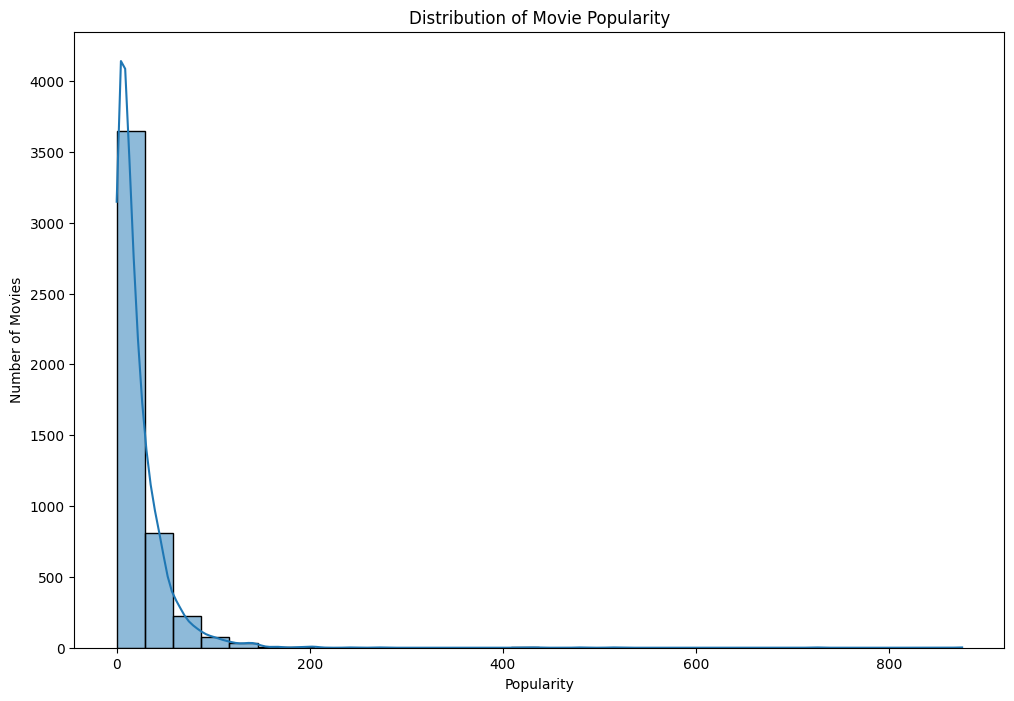

In [37]:
# Plot the distribution of movie popularity
plt.figure(figsize=(12, 8))
sns.histplot(tmdb_movies['popularity'], bins=30, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.show()

### Research Question 3: What is the relationship between budget and revenue?

We can analyze the relationship between the `budget` and `revenue` fields in the `tmdb_5000_movies.csv` dataset to understand how budget affects revenue.

Number of valid data points: 3229


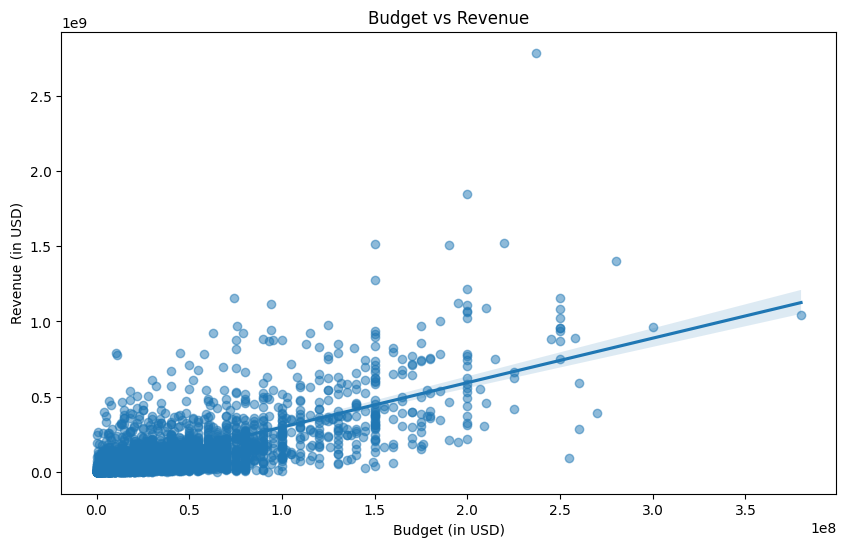

Correlation coefficient between budget and revenue: 0.71


In [38]:
# Filter out movies with budget or revenue equal to zero
valid_budget_revenue = tmdb_movies[(tmdb_movies['budget'] > 0) & (tmdb_movies['revenue'] > 0)]

# Check the number of valid data points
num_valid_points = len(valid_budget_revenue)
print(f"Number of valid data points: {num_valid_points}")

# Ensure there are enough data points to plot
if num_valid_points < 2:
    print("Not enough data points to plot. Please check the dataset for missing or zero values in 'budget' and 'revenue'.")
else:
    # Visual: Budget vs Revenue with Regression Line
    plt.figure(figsize=(10, 6))
    sns.regplot(data=valid_budget_revenue, x='budget', y='revenue', scatter_kws={'alpha': 0.5})
    plt.title('Budget vs Revenue')
    plt.xlabel('Budget (in USD)')
    plt.ylabel('Revenue (in USD)')
    plt.show()

    # Compute correlation coefficient
    correlation, _ = pearsonr(valid_budget_revenue['budget'], valid_budget_revenue['revenue'])
    print(f'Correlation coefficient between budget and revenue: {correlation:.2f}')

## Reflection

If I had more time to complete the project, I would focus on:

- Further cleaning the `genres` column to ensure each movie has distinct genre tags.

- Investigating additional variables such as director and cast to see their influence on movie success.

- Exploring other datasets to enrich the analysis and provide more insights into the factors contributing to movie revenue.